# Tensor Flow 01

># 0. Introduction

In [1]:
import tensorflow as tf

### 1. What is TF?
* Framework designed to run Deep Learning models **efficiently**
* Similar to Caffe, Torch, PyTorch, MXNet, CNTK, ...
* Can be applied in Mobile, Backend, Cloud, RaspberryPi, Google Cloud Platform, ...

### 2. Define and Run

In [2]:
# Define
const = tf.constant('hello tensorflow!!')

# Run
with tf.Session() as sess:
    _const = sess.run(const)
    print(_const)

b'hello tensorflow!!'


### 3. Graph
* 1) Define Tensor & Operator
* 2) Define Graph (having tensor & operator as nodes)
* 3) Run Graph as Session

#### 3.1. Tensor

In [3]:
tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

print(tf_string)
print(tf_int)
print(tf_float)

Tensor("Const_1:0", shape=(), dtype=string)
Tensor("Const_2:0", shape=(), dtype=int32)
Tensor("Const_3:0", shape=(), dtype=float32)


In [4]:
print(tf_string.name)
print(tf_string.shape)
print(tf_string.dtype)

Const_1:0
()
<dtype: 'string'>


#### 3.2. Operator

In [14]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
print(matmul)

Tensor("MatMul_2:0", shape=(1, 1), dtype=int32)


#### 3.3. Session

In [6]:
with tf.Session() as sess:
    _tf_string = sess.run(tf_string)
    _tf_int = sess.run(tf_int)
    _tf_float = sess.run(tf_float)
    
    print(_tf_string)
    print(_tf_int)
    print(_tf_float)

b'hello tensorflow'
10
3.14


In [9]:
with tf.Session() as sess:
    _matmul = sess.run(matmul)
    print(_matmul)

[[6]]


In [15]:
with tf.Session() as sess:
    _one, _two, _matmul = sess.run([one, two, matmul])
    print(_one)
    print(_two)
    print(_matmul)

[[1 1 1]]
[[2]
 [2]
 [2]]
[[6]]


### 4. constant
* Unchangeable Data

In [17]:
const = tf.constant(10)

with tf.Session() as sess:
    print(sess.run(const))

10


### 5. placeholder
* Used to treat large dataset

In [16]:
data = [1, 2, 3, 4, 5]
pl_data = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(pl_data, {pl_data: data}))
    # fetch & feeding

[ 1.  2.  3.  4.  5.]


### 6. Variable
* Weight

In [18]:
var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(var))

10


In [24]:
var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(var))

10


># 1. Tutorials

### 1. Linear Regression
#### 1.1. Scenarios
* 1) Generate Data
* 2) Build Model
* 3) Train Model
  * Calculate Loss Function
  * Gradient Descent Optimizer
  * Tune Learning Rate

#### 1.2. Implemetation

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Generate Data
samples = 1000
data = np.array([1e-3*float(i) for i in range(samples)])

In [68]:
label = 10. * data + 2. + np.random.randn(samples)
target = 10. * data + 2.

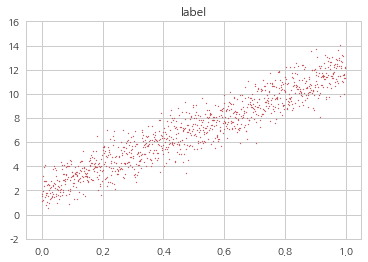

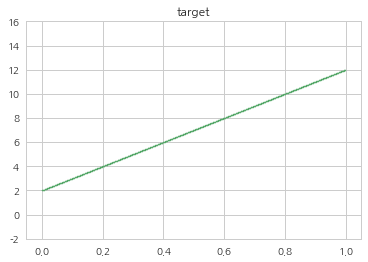

In [72]:
plt.figure(11)
plt.ylim(-2, 16)
plt.title('label')
plt.scatter(data, label, 1, 'r')

plt.figure(21)
plt.ylim(-2, 16)
plt.title('target')
plt.scatter(data, target, 1, 'g')

In [73]:
# Define Placeholders
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

In [85]:
# Define Parameters
w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

In [86]:
# Define Model
y = w * x + b

In [87]:
# Define Loss
loss = tf.losses.mean_squared_error(y_,y)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

step:0, loss:58.61532211303711, weight:0.08679179847240448, bias:0.1403215527534485
step:100, loss:4.483210563659668, weight:3.7005393505096436, bias:4.838479042053223
step:200, loss:3.441591739654541, weight:4.6634039878845215, bias:4.832753658294678
step:300, loss:2.880180835723877, weight:5.338200092315674, bias:4.511054039001465
step:400, loss:2.450118064880371, weight:5.916772365570068, bias:4.204711437225342
step:500, loss:2.1196024417877197, weight:6.4229912757873535, bias:3.9342846870422363
step:600, loss:1.8655823469161987, weight:6.866703510284424, bias:3.697066068649292
step:700, loss:1.6703537702560425, weight:7.25568962097168, bias:3.48909068107605
step:800, loss:1.5203133821487427, weight:7.596696376800537, bias:3.3067657947540283
step:900, loss:1.4049988985061646, weight:7.89564847946167, bias:3.1469271183013916
step:1000, loss:1.3163728713989258, weight:8.157733917236328, bias:3.006800651550293


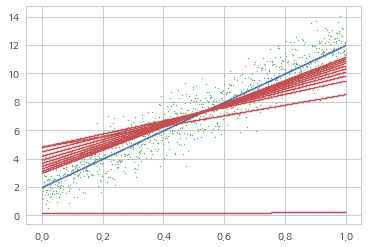

In [90]:
# Run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _loss_ = []
    plt.scatter(data, label, 1, 'g')
    plt.scatter(data, target, 1, 'b')
    for i in range(1001):
        _, _loss, _w, _b = sess.run([train_op, loss, w, b], feed_dict={x: data, y_: label})
        _loss_.append(_loss)
        if i%100 == 0:
            print('step:{}, loss:{}, weight:{}, bias:{}'.format(i, _loss, _w, _b))
            _pred = sess.run(y, {x: data})
            plt.scatter(data, _pred, 1, 'r')

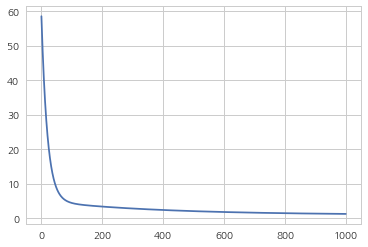

In [83]:
plt.plot(_loss_)

### 2. Logistic Regression
#### 2.1. Scenarios
* 1) Generate Data
* 2) Build Model
  * Label: 0 or 1
  * Use Sigmoid Function
* 3) Train Model
  * Calculate Loss Function - cross entropy

#### 2.2. Implementation

In [101]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

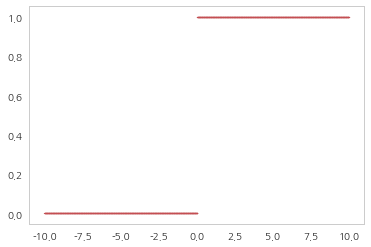

In [102]:
# Generate Data
samples = 1000
data = [1e-2*float(i) for i in range(-samples, samples)]
label = [1 if i > 3.14 else 0 for i in range(-samples, samples)]
plt.grid(False)
plt.scatter(data, label, 1, 'r')

In [103]:
# Build Model

x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

y = w * x + b

In [104]:
# Train Model

loss = tf.losses.sigmoid_cross_entropy(y_, y)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.


INFO:tensorflow:logits.dtype=<dtype: 'float32'>.


INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.


INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.


INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


step: 0, loss: 0.6931459307670593
step: 100, loss: 0.13942132890224457
step: 200, loss: 0.10745800286531448
step: 300, loss: 0.09289433062076569
step: 400, loss: 0.0839526578783989
step: 500, loss: 0.07768645137548447
step: 600, loss: 0.07295096665620804
step: 700, loss: 0.06919293105602264
step: 800, loss: 0.06610629707574844
step: 900, loss: 0.06350595504045486


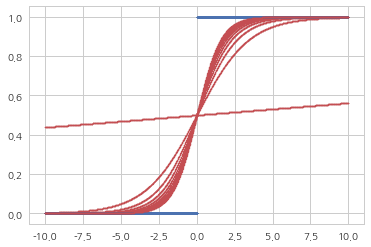

In [125]:
# Run

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _loss_ = []
    for i in range(1000):
        _, _loss = sess.run([train_op, loss], feed_dict={x: data, y_:label})
        _loss_.append(_loss)
        if i%100 == 0:
            _pred = sess.run(tf.nn.sigmoid(y), {x: data})
            plt.scatter(data, label, 1, 'b')
            plt.scatter(data, _pred, 1, 'r')
            print("step: {}, loss: {}".format(i, _loss))

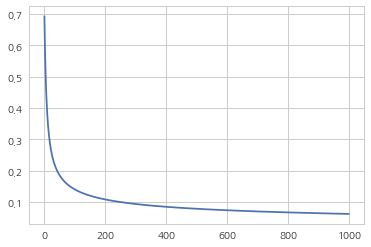

In [124]:
plt.plot(_loss_)